In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

Some methods require labels to be in "binary" type

In [3]:
def convert_to_binary(df):
    df.loc[df.Class == 'successful', 'Class'] = 1
    df.loc[df.Class == 'unsuccessful', 'Class'] = 0
    return df

Read dataset from csv files

In [4]:
testing_df = pd.read_csv("~/Downloads/Archive/testing.csv")
training_df = pd.read_csv("~/Downloads/Archive/training.csv")
reduced_df = pd.read_csv("~/Downloads/Archive/reducedSet.csv")
full_df = pd.read_csv("~/Downloads/Archive/fullSet.csv")

testing_df = convert_to_binary(testing_df)
training_df = convert_to_binary(training_df)

Divide dataframe to X's and Y's. Label values should be transposed

In [5]:
X_test, Y_test = testing_df[reduced_df['x']], testing_df.Class.tolist()
X_train, Y_train = training_df[reduced_df['x']], training_df.Class.tolist()

Center and scale date using Robust scaler.
Scale features using statistics that are robust to outliers.

In [6]:
scaler = RobustScaler(with_centering=True,
                      with_scaling=True).fit(X_test)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

Tune hyperparams using GridSearch
tol = Threshold used for rank estimation
reg_param = Regularizes the covariance estimate

In [7]:
gs = GridSearchCV(QuadraticDiscriminantAnalysis(),
                  param_grid={'tol': [1, 0.1, 0.01, 0.001, 0.0001],
                              'reg_param': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
                  scoring=make_scorer(roc_auc_score),
                  n_jobs=1)
gs.fit(X_train, Y_train)

/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variab

GridSearchCV(cv=None, error_score='raise',
       estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tol': [1, 0.1, 0.01, 0.001, 0.0001], 'reg_param': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [8]:
gs.best_params_

{'reg_param': 0.1, 'tol': 1}

In [9]:
gs.best_score_

0.67088656207686803

Multiple Discriminant Analysis isnt implemented in Python data analysis libs.
We used another non-linear discriminant analysis QDA instead of MDA.
Quadratic Discriminant Analysis - classifier with a quadratic decision boundary, 
generated by fitting class conditional densities to the data and using Bayes’ rule

In [10]:
clf = QuadraticDiscriminantAnalysis(reg_param=0.1, tol=1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Calculate confusion matrix

In [11]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[284,  45],
       [ 82, 107]])

Accuracy

In [12]:
(cm[0,0]+cm[1,1])/len(Y_test)

0.75482625482625487

Calculate ROC and Area under ROC

In [13]:
Y_pred_prob = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob[:, 1])
under_roc = roc_auc_score(Y_test, Y_pred_prob[:, 1])
under_roc

0.85088692687476886

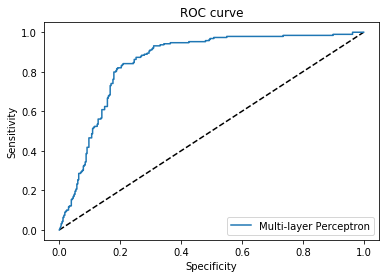

In [14]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Multi-layer Perceptron')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()